# Logictic Regressor

* **Sınıflandırma modellerinde karşılaştırılması için hata olarak accuracy_score göz önüne alınacaktır.**
** **accuary_score tahmin edilen değer gerçek değer ile açıklanabilirliğini ifade etmektedir.**

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  #lojistic algoritması
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [34]:
#veri seti : Diabet hastalarının verileri mevcut. Bağımsız değişkenler girilidğinde diabet hastası olup olmadığı tahmin edilecektir.
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop("Outcome", axis = 1)

In [35]:
df["Outcome"].value_counts()  #kaçtane 0 ve 1 olan yani hasta sayısı öğrenebilir.

0    500
1    268
Name: Outcome, dtype: int64

### Model & Tahmin

In [36]:
loj_model = LogisticRegression(solver ="liblinear").fit(X,y) #model
y_pred = loj_model.predict(X) #tahmin

In [37]:
#Tahmin sonucu 0 olan değerlerin tahmini 0 yada 1 olması, aynı şekilde 1 olan değerlerin 0 yada 1 olması sayılarını ifade eden matriks
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [38]:
#HATA
accuracy_score(y,y_pred)  #açıklanabilirliği yüzdelik olarak

0.7747395833333334

### ROK EĞRİSİ 
* **AUC(Area Under Curve)(Eğri altındaki alan) Büyük ise başarı oranı fazladır**

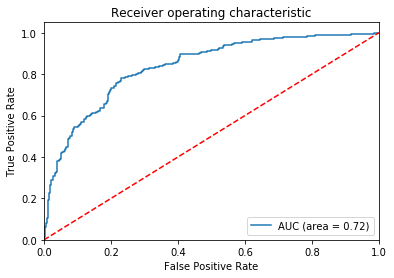

In [41]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model Tuning

* **Logistic Regresyonda da parametreler mevcuttdur.**

In [52]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [53]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train, y_train)

In [54]:
y_pred = loj_model.predict(X_test)

In [57]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [63]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()
#cross validation sonucu hataların ortalaması

0.7704710144927536